In [32]:
# Import Libraries 

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [4]:
!pip install opencv-python

     |████████████████████████████████| 46.4 MB 826 kB/s eta 0:00:01


In [33]:
# Working On OpenCV

The type of this input is <class 'numpy.ndarray'>
Shape: (4000, 6000, 3)


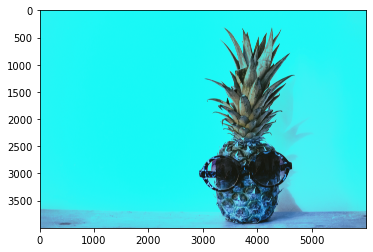

In [18]:
image = cv2.imread('/Users/sadhanasharma/Desktop/safari.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


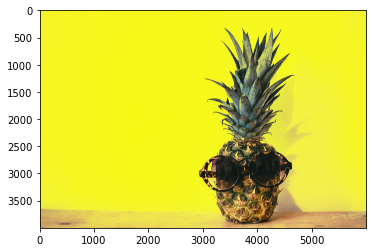

In [20]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

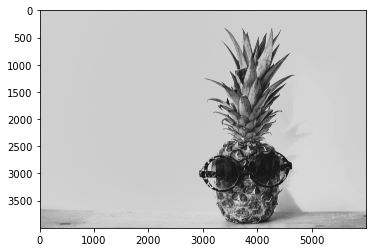

In [23]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

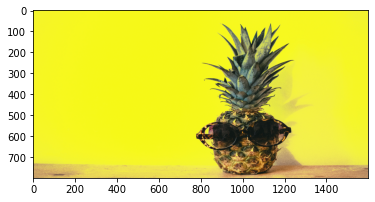

In [24]:
resized_image = cv2.resize(image, (1600,800))
plt.imshow(resized_image)

In [34]:
# Identification Of Color

In [35]:
def RGB2HEX(color):
    return ""#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))"

In [36]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [39]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    
    # We get ordered colors by iterating through the keys
    
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors


[array([120.28291747, 127.9318618 , 105.01919386]),
 array([243.31529709, 241.5778129 ,  62.69570164]),
 array([233.34295846, 220.62259372,  85.71555218]),
 array([33.76920983, 36.03873719, 27.21917808]),
 array([153.80111008, 111.70166512,  58.00647549]),
 array([246.6075277 , 248.12696596,  29.85932976]),
 array([200.83086698, 167.77928267, 101.75520441]),
 array([82.88699643, 76.04854666, 53.24864865])]

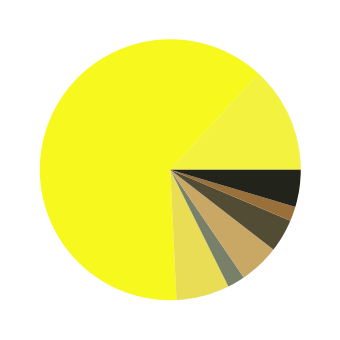

In [42]:
get_colors(get_image('/Users/sadhanasharma/Desktop/safari.jpg'), 8, True)

In [43]:
# Searching images using color

In [120]:
import os

IMAGE_DIRECTORY = '/Users/sadhanasharma/Desktop/images'
COLORS = {
    'GREEN': [0,128,0],
    'BLUE': [0,0,128],
    'YELLOW': [255,255,0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

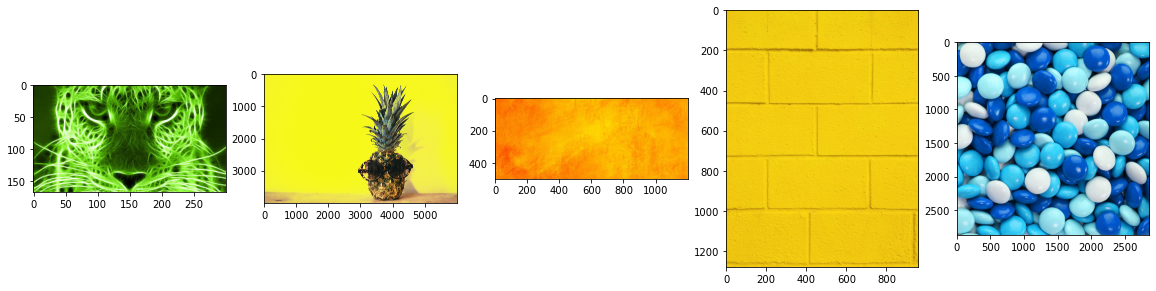

In [121]:
plt.figure(figsize=(20,10))
for i in range(len(images)):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i])

In [122]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [123]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1,5,index)
            plt.imshow(images[i])
            index += 1

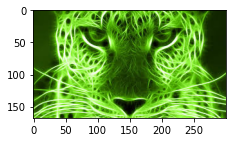

In [124]:
# Search for GREEN
plt.figure(figsize = (20,10))
show_selected_images(images, COLORS['GREEN'],60,5)

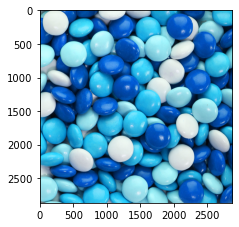

In [125]:
# Search for BLUE
plt.figure(figsize = (20,10))
show_selected_images(images,COLORS['BLUE'],60,5)

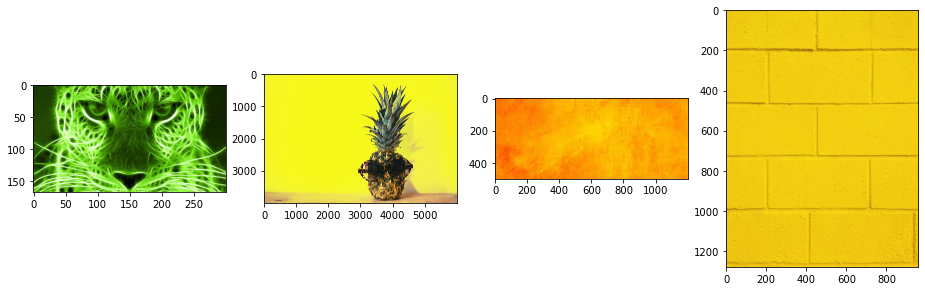

In [127]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)